<a href="https://colab.research.google.com/github/sprabhala-cpu/Machine-Learning/blob/main/mcqresponses_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
!wget 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'

--2021-05-13 05:49:56--  https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tulip-lab/sit742/master/Assessment/2020/data/MCQResponses.csv [following]
--2021-05-13 05:49:56--  https://raw.githubusercontent.com/tulip-lab/sit742/master/Assessment/2020/data/MCQResponses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1018741 (995K) [text/plain]
Saving to: ‘MCQResponses.csv’

MCQResponses.csv    100%[===================>] 994.86K  --.-KB/s    in 0.06s   

2021-05-13 05:49:56 (16.4 MB/s) - ‘MCQResponses.csv’ saved [1

In [3]:
import pandas as pd
data=pd.read_csv('/content/MCQResponses.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GenderSelect                  4327 non-null   object 
 1   Country                       4327 non-null   object 
 2   Age                           4327 non-null   int64  
 3   EmploymentStatus              4327 non-null   object 
 4   CodeWriter                    4327 non-null   object 
 5   CurrentJobTitleSelect         4327 non-null   object 
 6   TitleFit                      4251 non-null   object 
 7   CurrentEmployerType           4275 non-null   object 
 8   MLToolNextYearSelect          4206 non-null   object 
 9   MLMethodNextYearSelect        4170 non-null   object 
 10  LanguageRecommendationSelect  4228 non-null   object 
 11  FormalEducation               4327 non-null   object 
 12  MajorSelect                   3952 non-null   object 
 13  Fir

In [5]:
#statistics
data.describe()

,Age,CompensationAmount
count,4327.000000,4.327000e+03
mean,34.129651,2.891714e+06
std,9.476011,2.946122e+07
min,0.000000,1.090000e+01
25%,27.000000,5.000000e+04
50%,32.000000,1.000000e+05
75%,39.000000,2.200000e+05
max,99.000000,8.000000e+08


In [6]:
print(data.isnull().any())
print(' ')
print(data.isnull().sum())
print('')
print(data.notnull().sum())

GenderSelect                    False
Country                         False
Age                             False
EmploymentStatus                False
CodeWriter                      False
CurrentJobTitleSelect           False
TitleFit                         True
CurrentEmployerType              True
MLToolNextYearSelect             True
MLMethodNextYearSelect           True
LanguageRecommendationSelect     True
FormalEducation                 False
MajorSelect                      True
FirstTrainingSelect              True
CompensationAmount              False
CompensationCurrency            False
JobSatisfaction                  True
dtype: bool
 
GenderSelect                      0
Country                           0
Age                               0
EmploymentStatus                  0
CodeWriter                        0
CurrentJobTitleSelect             0
TitleFit                         76
CurrentEmployerType              52
MLToolNextYearSelect            121
MLMethodNextYear

In [7]:
df_demog_ds=data.loc[data['CurrentJobTitleSelect']=='Data Scientist']
#selecting job title data scientist

In [8]:
print(df_demog_ds['FormalEducation'].value_counts())
print(' ')
print(df_demog_ds['FormalEducation'].value_counts()/len(df_demog_ds)*100)

Master's degree                                                      635
Doctoral degree                                                      326
Bachelor's degree                                                    252
Professional degree                                                   25
Some college/university study without earning a bachelor's degree     19
I did not complete any formal education past high school               6
Name: FormalEducation, dtype: int64
 
Master's degree                                                      50.277118
Doctoral degree                                                      25.811560
Bachelor's degree                                                    19.952494
Professional degree                                                   1.979414
Some college/university study without earning a bachelor's degree     1.504355
I did not complete any formal education past high school              0.475059
Name: FormalEducation, dtype: float64


In [9]:
import matplotlib.pyplot as plt
education=pd.DataFrame(df_demog_ds['FormalEducation'].value_counts())
education

,FormalEducation
Master's degree,635
Doctoral degree,326
Bachelor's degree,252
Professional degree,25
Some college/university study without earning a bachelor's degree,19
I did not complete any formal education past high school,6


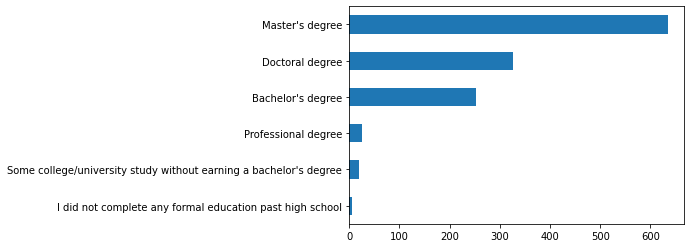

In [10]:
(df_demog_ds['FormalEducation'].value_counts()).sort_values().plot(kind = 'barh')

In [11]:
conversion_df=pd.read_csv('/content/ConversionRates.csv')


In [12]:
conversion_df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
conversion_df

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
...,...,...
81,SVC,0.114124
82,SZL,0.077002
83,UYU,0.034642
84,XAF,0.001823


In [14]:
df_demog_ds.head(3)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
9,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9
10,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8


In [15]:
salary_df=pd.merge(df_demog_ds,conversion_df,left_on='CompensationCurrency',right_on='originCountry',how='inner')

In [16]:
salary_df.head(2)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,originCountry,exchangeRate
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,INR,0.01562
1,Male,India,29,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,Python,Bayesian Methods,R,Master's degree,Computer Science,University courses,120000.0,INR,7,INR,0.01562


In [17]:
salary_df['australian_pay']=salary_df['CompensationAmount']*salary_df['exchangeRate']

In [18]:
salary_df.head(2)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,originCountry,exchangeRate,australian_pay
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,INR,0.01562,1483.9
1,Male,India,29,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,Python,Bayesian Methods,R,Master's degree,Computer Science,University courses,120000.0,INR,7,INR,0.01562,1874.4


In [19]:
salary_df['australian_pay'].describe()

count      1262.000000
mean      80941.171090
std       60806.927249
min           0.060000
25%       34446.431400
50%       71268.060000
75%      116395.188500
max      595884.600000
Name: australian_pay, dtype: float64

In [20]:
Australia_respondes=salary_df.loc[salary_df['Country']=='Australia']

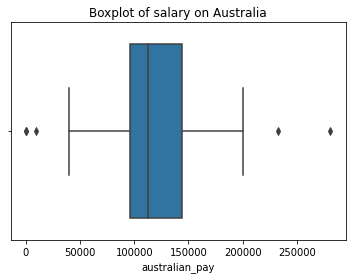

In [21]:

import seaborn as sns
sns.boxplot(x=Australia_respondes['australian_pay'])

plt.title("Boxplot of salary on Australia")
plt.show()

In [23]:
Australia_respondes['australian_pay'].describe()

count        29.00000
mean     119817.97885
std       67153.46513
min          72.20790
25%       96277.20000
50%      112323.40000
75%      144415.80000
max      280808.50000
Name: australian_pay, dtype: float64

In [28]:
Australia_respondes=Australia_respondes.loc[(Australia_respondes['australian_pay']>40000) & (Australia_respondes['australian_pay']<250000)]

In [29]:
Australia_respondes.describe()

,Age,CompensationAmount,exchangeRate,australian_pay
count,25.000000,25.000000,2.500000e+01,25.000000
mean,35.040000,158760.000000,8.023100e-01,127374.735600
std,6.648809,61300.679713,2.266233e-16,49182.148341
min,27.000000,50000.000000,8.023100e-01,40115.500000
25%,30.000000,125000.000000,8.023100e-01,100288.750000
50%,34.000000,147000.000000,8.023100e-01,117939.570000
75%,37.000000,180000.000000,8.023100e-01,144415.800000
max,53.000000,290000.000000,8.023100e-01,232669.900000


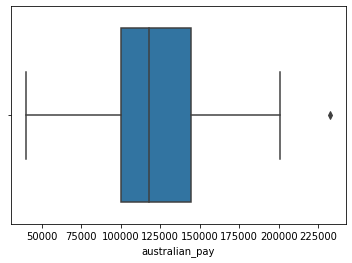

In [30]:
sns.boxplot(x=Australia_respondes['australian_pay'])

In [31]:
#1.3 exploring the data scientist demographs


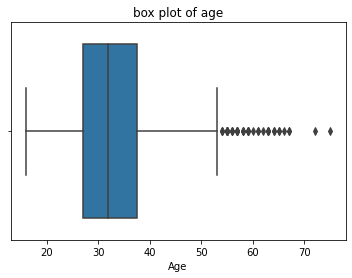

In [39]:
plt.title('box plot of age')
sns.boxplot(x=df_demog_ds['Age'])
plt.show()


In [50]:
#five number summary descriptive statistics
import numpy as np

df_demog_ds['Age'].describe()
print(df_demog_ds['Age'].min())
print(df_demog_ds['Age'].max())
print(df_demog_ds['Age'].std())
print(np.round(df_demog_ds['Age'].mean()))
print(df_demog_ds['Age'].median())

16
75
8.860529603022176
34.0
32.0


In [69]:
#((df_demog_ds['Age']>=24)&(df_demog_ds['Age']<=60)).value_counts()

''' we can also use between operator'''
age=df_demog_ds[df_demog_ds['Age'].between(24,60)]

In [71]:
age.describe()

,Age,CompensationAmount
count,1188.000000,1.188000e+03
mean,33.872054,2.089826e+06
std,7.957901,2.183864e+07
min,24.000000,1.500000e+01
25%,28.000000,6.000000e+04
50%,32.000000,1.100000e+05
75%,38.000000,1.800000e+05
max,60.000000,5.300000e+08


In [61]:
#number of people with age group of 24 and 60
(df_demog_ds['Age']<18).value_counts()

False    1262
True        1
Name: Age, dtype: int64

In [72]:
df_demog_ds[df_demog_ds['Age']<18]

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
535,Male,United States,16,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Python,Genetic & Evolutionary Algorithms,R,Some college/university study without earning ...,Mathematics or statistics,Self-taught,50000.0,USD,5


In [73]:
#gender
df_demog_ds['GenderSelect'].value_counts()

Male                    1089
Female                   168
A different identity       6
Name: GenderSelect, dtype: int64

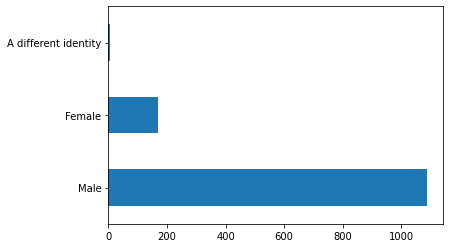

In [79]:
#plot
df_demog_ds['GenderSelect'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.show()

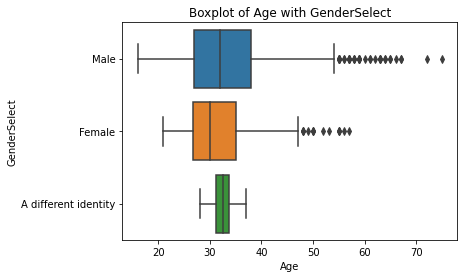

In [86]:

plt.title("Boxplot of Age with GenderSelect")
sns.boxplot(data=df_demog_ds,x='Age',y='GenderSelect')
plt.show()

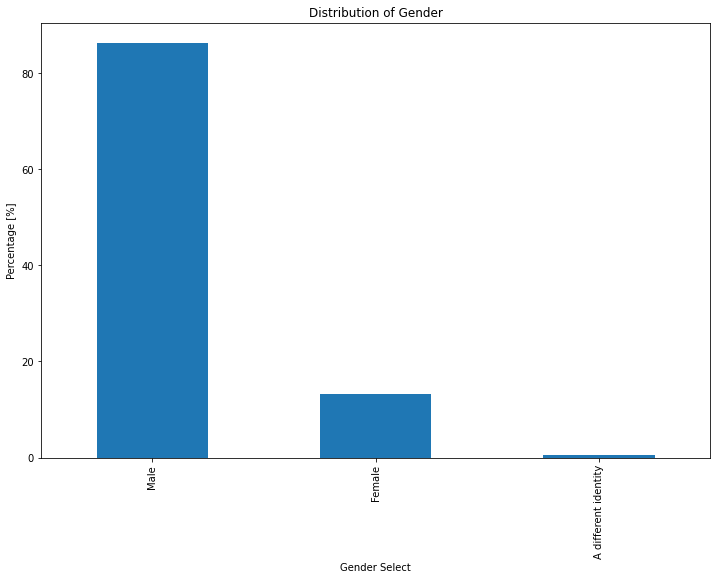

In [96]:

plt.figure(figsize=(12,8))
plt.title('Distribution of Gender')
plt.xlabel('Gender Select')
plt.ylabel('Percentage [%]')
(df_demog_ds['GenderSelect'].value_counts()/len(df_demog_ds)*100).plot(kind='bar')

plt.show()

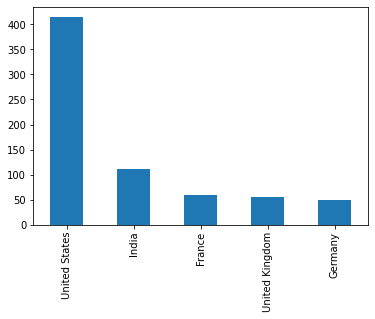

In [101]:
#country
df_demog_ds['Country'].value_counts().sort_values(ascending=False)[:5].plot(kind='bar')
plt.show()

In [176]:
df_demog_ds['Country'].value_counts().sum()

1263

In [156]:
df_country

United States     414
India             111
France             60
United Kingdom     55
Germany            50
Name: Country, dtype: int64

In [157]:
df_country=pd.DataFrame(df_country).reset_index()

In [178]:
df_country.columns=['country','count']

In [179]:
df_country

United States     414
India             111
France             60
United Kingdom     55
Germany            50
Name: Country, dtype: int64

In [180]:
df_country=pd.DataFrame(df_country).reset_index()
df_country.columns=['Country','count']

In [181]:
df_country['percentage']=df_country['count']/df_demog_ds['Country'].value_counts().sum()*100

In [182]:
df_country

,Country,count,percentage
0,United States,414,32.779097
1,India,111,8.788599
2,France,60,4.750594
3,United Kingdom,55,4.354711
4,Germany,50,3.958828


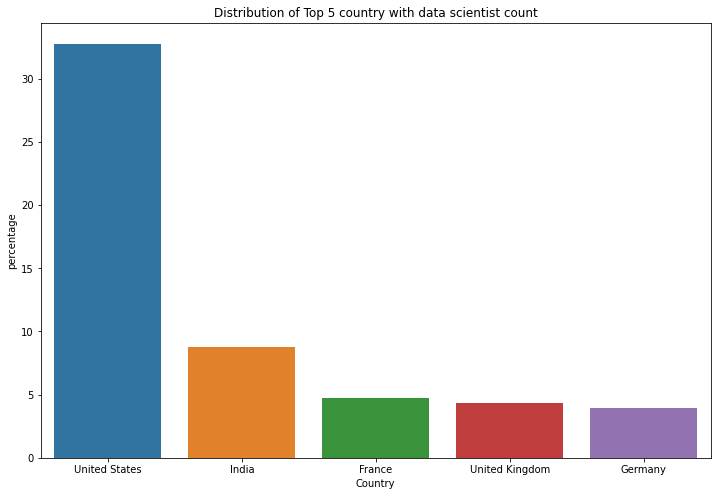

In [191]:

plt.figure(figsize=(12,8))
plt.title('Distribution of Top 5 country with data scientist count')
sns.barplot(x="Country", y="percentage", data=df_country)
plt.show()

In [193]:
df_demog_ds_per=df_demog_ds['Country'].value_counts(normalize=True)*100

In [195]:
df_country_top5=df_demog_ds_per.head(5)

In [196]:
df_country_top5

United States     32.779097
India              8.788599
France             4.750594
United Kingdom     4.354711
Germany            3.958828
Name: Country, dtype: float64

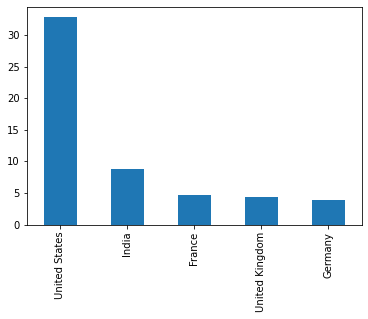

In [223]:
ax=df_country_top5.plot(kind='bar')


In [201]:
country_list=['United States', 'India', 'Australia', 'Pakistan']

In [256]:
for i in country_list:
  new_df=df_demog_ds[df_demog_ds['Country']==i]
  age=new_df.groupby(by='GenderSelect').Age.mean()
  print('in {}, the mean and median age of different genders is as follows \n {}'.format(i,age))
  print()
  

in United States, the mean and median age of different genders is as follows 
 GenderSelect
A different identity    31.000000
Female                  33.436620
Male                    35.649123
Name: Age, dtype: float64

in India, the mean and median age of different genders is as follows 
 GenderSelect
Female    29.000000
Male      30.019802
Name: Age, dtype: float64

in Australia, the mean and median age of different genders is as follows 
 GenderSelect
Female    32.6
Male      35.0
Name: Age, dtype: float64

in Pakistan, the mean and median age of different genders is as follows 
 GenderSelect
Male    32
Name: Age, dtype: int64

